In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generating some simple x values over the [0, 2) interval.
x = np.random.rand(20) * 2

In [21]:
# Generating labels with noise
y = 4 * x + np.random.normal(0, 0.3, x.shape[0])  + 3

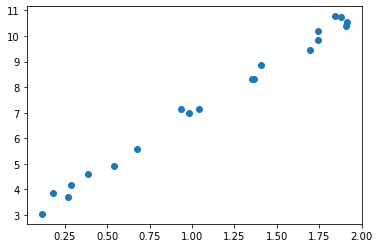

In [22]:
# Visualising our simple dataset
plt.scatter(x, y);

In [23]:
def kernel(x_i, x_j, c = 1):
    """Simple definition of the linear kernel"""
    return x_i.T @ x_j + c

def kernel_matrix(data, c = 1):
    """Building up the kernel matrix with the linear kernel"""
    if data.ndim == 1:
        data = data[:, None]
    kernel_matrix = np.ones((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            kernel_matrix[i,j] = kernel(data[i,:], data[j,:], c) 
    
    return kernel_matrix

In [24]:
def kernel_regression(K, y):
    """Calculate the kernelised ridge regression coefficients for the given data.
    
    Args:
    K (ndarray): The kernel matrix for the data.
    y (ndarray): The y values for the data.
    
    Returns:
    alpha (ndarray): Array of regression coefficients for the given data."""

    alpha = np.linalg.pinv(K) @ y # Using pseudoinverse since we do not have a regulariser and can incur in numerical errors
    return alpha

In [25]:
def evaluate_kernel(X_train, X_test, y_test, alpha, c):
    """Returns the mse for a given Gaussian kernel ridge regression fit.
    Also return y_hats , i.e. the pred y"""
    
    if X_train.ndim == 1 or X_test.ndim == 1:
        X_train = X_train[:,None]
        X_test = X_test[:, None]
    y_hats = np.zeros_like(y_test)
    for el in range(y_hats.shape[0]):
        for i in range(alpha.shape[0]):
            y_hats[el] += alpha[i] * kernel(X_train[i,:], X_test[el,:], c) 
    residuals  = y_test - y_hats
    mse = np.mean(residuals ** 2)
    return mse, y_hats

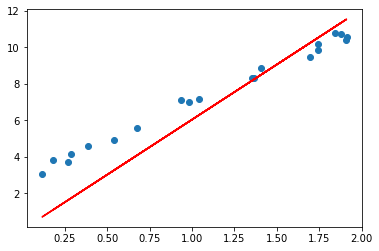

In [44]:
# Bringing everything together to play with the value of c

# Change c here and re-run the cell to see its effect on regression.
c = 0

# Make kernel metrix
design = kernel_matrix(x, c)

# Fit
alpha = kernel_regression(design, y)

# Evaluate
mse, y_hats = evaluate_kernel(x, x, y, alpha, c)

# Plot
plt.plot(x, y_hats, c = 'red')
plt.scatter(x, y);

We can see, by playing around with c, that the effect it has on linear regression is allowing learning of the bias term. If c = 0, our model cannot learn the bias term. For any c > 0, the model is capable of learning the bias term, improving regression accuracy.